# Connecting or Mounting the Drive to the Google Colab




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Unzipping the Dataset Folder


In [2]:
!unzip /content/drive/My\ Drive/Densenet\ Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1091).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1092).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1093).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1094).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1095).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1096).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1097).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1098).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1099).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (11).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (110).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1100).JPG  
  inflating: Total/Tomato_Spider_mites/Tomato_Spider_mites (1101).JPG  
  inflating: Tot

# Loading the Data into System

In [4]:
DATASET_DIR='/content/Total/'


# Glob will be useful for retreiving the internal paths where I have to total of 10 classes which is displayed in the output.
from glob import glob

Tomato_Leaf_Diseases_Train = glob('/content/Total/*')
Tomato_Leaf_Diseases_Train

['/content/Total/Tomato_Late_blight',
 '/content/Total/Tomato_Yellow_Leaf_Curl_Virus',
 '/content/Total/Tomato_Septoria_leaf_spot',
 '/content/Total/Tomato_Target_Spot',
 '/content/Total/Tomato_healthy',
 '/content/Total/Tomato_mosaic_virus',
 '/content/Total/Tomato_Bacterial_spot',
 '/content/Total/Tomato_Early_blight',
 '/content/Total/Tomato_Spider_mites',
 '/content/Total/Tomato_Leaf_Mold']

# Importing the required Keras dependancies

In [5]:
import os
import cv2
import keras
import scipy.io
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from glob import glob
from tqdm import tqdm
from skimage import data
from keras import regularizers
from skimage.io import imread
from keras.layers import Dropout
from skimage.color import rgb2gray
from keras.utils import plot_model
from keras.optimizers import Adam
from numpy.random import permutation
from keras.preprocessing import image
#from keras.callbacks import EarlyStopping
#from os.path import dirname, join as pjoin
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,Sequential, Input, load_model

from keras.models import Model
from keras.utils import np_utils
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.layers.core import Activation
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint
from keras.layers import Conv2D,Input,Dense,MaxPooling2D,BatchNormalization,ZeroPadding2D,Flatten,Dropout

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis for easy way of understanding the Dense Net Model


In [ ]:
#Creating a list for all the classes in the dataset and storing it in the disease types variable
disease_types = ['Tomato_mosaic_virus',
                 'Tomato_Late_blight',
                 'Tomato_Septoria_leaf_spot',
                 'Tomato_Bacterial_spot',
                 'Tomato_Spider_mites',
                 'Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato_Leaf_Mold',
                 'Tomato_Target_Spot',
                 'Tomato_healthy',
                 'Tomato_Early_blight']

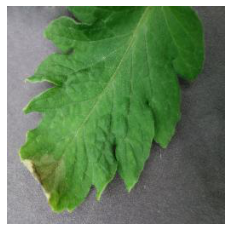

In [ ]:
#Reading the Image to present how make sure system understands that the given data is Image Data

from skimage.io import imread
img = imread('/content/Total/Tomato_healthy/Tomato_healthy (1003).JPG')

plt.imshow(img)
plt.axis('off')
plt.show()

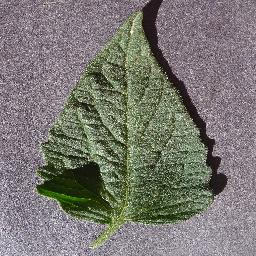

In [ ]:
# Printing the Image in other way
from IPython.display import Image, display

Image('/content/Total/Tomato_Leaf_Mold/Tomato_Leaf_Mold (1001).JPG')

In [ ]:
#Canny edge detection by resizing

default_image_size = tuple((128,128))

def img_to_np(DIR,flatten=True):
    cv_img=mpimg.imread(DIR,0)
    cv_img=cv2.resize(cv_img,default_image_size)
    img = np.uint8(cv_img)
    if(flatten):
        img=img.flatten()
        return img

In [ ]:
#Appending all the folders and image files in the dataset for providing the Graphical Representation of Tomato Diseases
TRAIN_DIR="/content/Total/"

index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
        if index not in data:
            data[index]=[]
        try: 
            data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
        except:
            print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1 

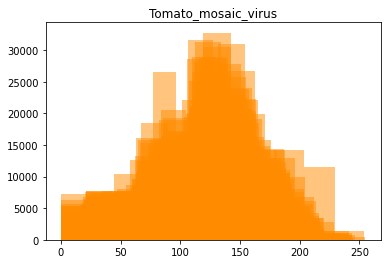

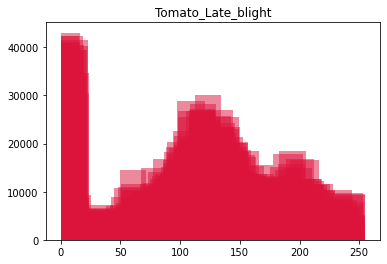

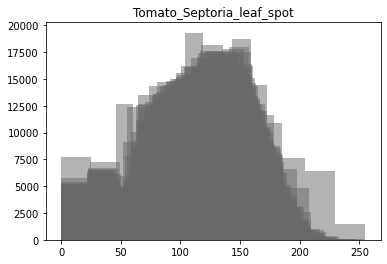

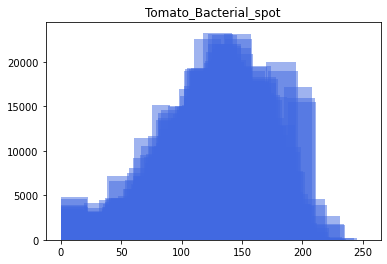

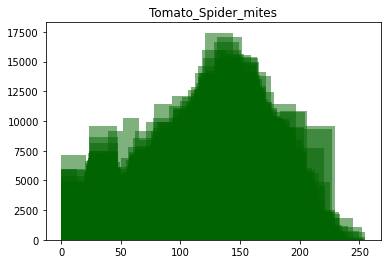

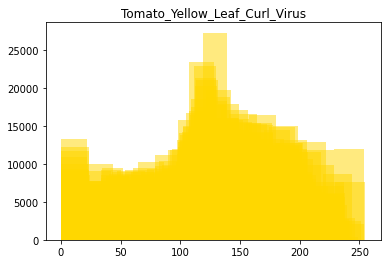

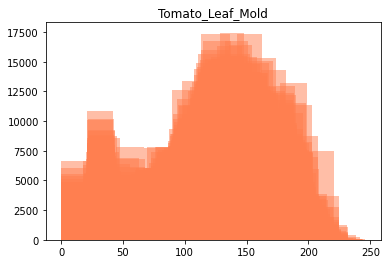

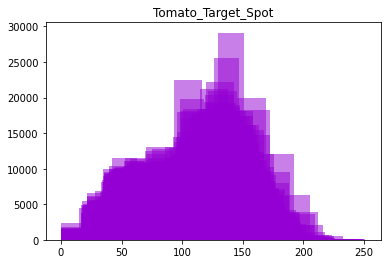

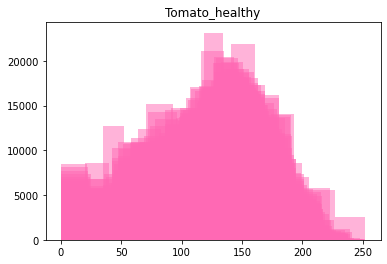

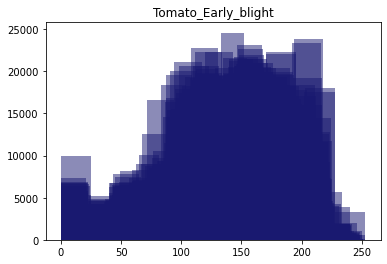

In [ ]:
#Declaring the limit size for the graphs to take only 500 images for plotting

CLASS_LIMIT=500 
colors=["darkorange","crimson","dimgray","royalblue","darkgreen","gold","coral","darkviolet","hotpink","midnightblue"]
for index_class in range(len(data)):
    index=0
    for arr in data[index_class]:
        plt.hist(arr,color=colors[index_class],alpha=0.5)
        if(index>CLASS_LIMIT):
            plt.title(disease_types[index_class])
            plt.show()
            break
        index=index+1    

In [ ]:
# Creating the List Directory to read all the images in 10 different folders

data_set = '/content/Total'

labels = os.listdir(data_set)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 10
folder: Tomato_Yellow_Leaf_Curl_Virus images: 1700
folder: Tomato_Late_blight images: 1700
folder: Tomato_healthy images: 1700
folder: Tomato_mosaic_virus images: 1700
folder: Tomato_Target_Spot images: 1700
folder: Tomato_Early_blight images: 1700
folder: Tomato_Spider_mites images: 1700
folder: Tomato_Bacterial_spot images: 1700
folder: Tomato_Leaf_Mold images: 1700
folder: Tomato_Septoria_leaf_spot images: 1700
Total images: 17000


In [ ]:
#Printing the train data tail values which are stored by the system from the dataset

train_dir='/content/Total/'

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.tail()

,File,DiseaseID,Disease Type
16995,Tomato_Early_blight/Tomato_Early_blight (421).JPG,9,Tomato_Early_blight
16996,Tomato_Early_blight/Tomato_Early_blight (520).JPG,9,Tomato_Early_blight
16997,Tomato_Early_blight/Tomato_Early_blight (454).JPG,9,Tomato_Early_blight
16998,Tomato_Early_blight/Tomato_Early_blight (508).JPG,9,Tomato_Early_blight
16999,Tomato_Early_blight/Tomato_Early_blight (912).JPG,9,Tomato_Early_blight


In [ ]:
# Displaying the train data head images which are first 5 images reading by the system
# Seed is to randomize the values the value is given as 64 where all the 64 images will be picked by the system randomly out of 10000 images

SEED = 64 
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reseting the indices values
train.head()

,File,DiseaseID,Disease Type
0,Tomato_Late_blight/Tomato_Late_blight (86).JPG,1,Tomato_Late_blight
1,Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...,5,Tomato_Yellow_Leaf_Curl_Virus
2,Tomato_Early_blight/Tomato_Early_blight (1131)...,9,Tomato_Early_blight
3,Tomato_mosaic_virus/Tomato_mosaic_virus (176).JPG,0,Tomato_mosaic_virus
4,Tomato_Bacterial_spot/Tomato_Bacterial_spot (1...,3,Tomato_Bacterial_spot


In [ ]:
# Provides all the information of the Dataset

train.info

<bound method DataFrame.info of                                                     File  ...                   Disease Type
0         Tomato_Late_blight/Tomato_Late_blight (86).JPG  ...             Tomato_Late_blight
1      Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...  ...  Tomato_Yellow_Leaf_Curl_Virus
2      Tomato_Early_blight/Tomato_Early_blight (1131)...  ...            Tomato_Early_blight
3      Tomato_mosaic_virus/Tomato_mosaic_virus (176).JPG  ...            Tomato_mosaic_virus
4      Tomato_Bacterial_spot/Tomato_Bacterial_spot (1...  ...          Tomato_Bacterial_spot
...                                                  ...  ...                            ...
16995  Tomato_Spider_mites/Tomato_Spider_mites (1414)...  ...            Tomato_Spider_mites
16996  Tomato_Yellow_Leaf_Curl_Virus/Tomato_Yellow_Le...  ...  Tomato_Yellow_Leaf_Curl_Virus
16997  Tomato_Early_blight/Tomato_Early_blight (321).JPG  ...            Tomato_Early_blight
16998    Tomato_Late_blight/Tomato_Lat

In [ ]:
# Colum variables stored in the Model

train.columns

Index(['File', 'DiseaseID', 'Disease Type'], dtype='object')

In [ ]:
# Value count for images in all 10 folders

train['DiseaseID'].value_counts()

In [ ]:
# Value counts for the model with disease name along with the number of diseases

train['Disease Type'].value_counts()

Tomato_Spider_mites              1700
Tomato_Late_blight               1700
Tomato_Bacterial_spot            1700
Tomato_Leaf_Mold                 1700
Tomato_Early_blight              1700
Tomato_mosaic_virus              1700
Tomato_Target_Spot               1700
Tomato_Septoria_leaf_spot        1700
Tomato_Yellow_Leaf_Curl_Virus    1700
Tomato_healthy                   1700
Name: Disease Type, dtype: int64

In [ ]:
# Finding the Data Types for the Files

train.dtypes

File            object
DiseaseID        int64
Disease Type    object
dtype: object

In [ ]:
# Count for each file in the model 

train.count()

File            17000
DiseaseID       17000
Disease Type    17000
dtype: int64

In [ ]:
# Description for the model

train.describe()

,DiseaseID
count,17000.000000
mean,4.500000
std,2.872366
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


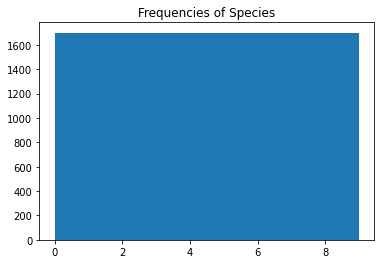

<Figure size 864x864 with 0 Axes>

In [ ]:
# Plotting the histogram
plt.hist(train['DiseaseID'])
plt.title('Frequencies of Species')
plt.figure(figsize=(12, 12))
plt.show()

# Data Augmentation

In [ ]:
#This helps in increasing the data
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Initializing the Le Net Model

In [ ]:
#Reshaping the images for the better model performance 
IMAGE_SIZE = 60
def read_image(filepath):
    return cv2.imread(os.path.join(TRAIN_DIR, filepath)) # Loading a colored image as a default flag

# Resizing the image to the target size which is given as 64
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
#To find the shape of the Train Folder in the Dataset 
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
        
# Normalization of the dataset
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

17000it [00:27, 615.64it/s]


Train Shape: (17000, 60, 60, 3)


In [ ]:
Y_train = train['DiseaseID'].values
print('Before shape value:',Y_train.shape)

Y_train = to_categorical(Y_train, num_classes=10)
print('shape value after adding the classes:',Y_train.shape)

Before shape value: (17000,)
shape value after adding the classes: (17000, 10)


# Splitting the data for training and Testing purpose

In [ ]:
from sklearn.model_selection import train_test_split
BATCH_SIZE = 128

# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

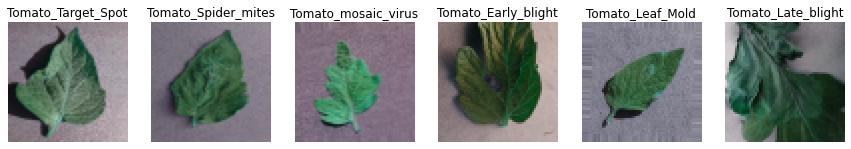

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(15, 15))
for i in range(6):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [ ]:
EPOCHS = 50
SIZE = 60
N_ch = 3

In [ ]:
#Creating the Le_net Model function

def LeNet_Model():
    model = Sequential()# creating a sequential model

    model.add(Convolution2D(20, 5, 5, padding="same",input_shape=(60, 60,3))) # 3,60,60 tha pehle
    model.add(Dropout(0.2))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # adding second set of CONV -> RELU -> POOL
    model.add(Convolution2D(50, 5, 5, padding="same"))
    model.add(Dropout(0.2))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2))) # specifying the order of dimensions

    # adding set of FC -> RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Dropout(0.2))
    model.add(Activation("relu"))
 
    # adding softmax classifier
    model.add(Dense(10))          # 7 categories
    model.add(Dropout(0.2))
    model.add(Activation("softmax"))
        
    return model

In [ ]:
#Printing the model for identifying the DenseNet Parameters
model = LeNet_Model()

annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('LeNet.h5', verbose=1, save_best_only=True)

In [ ]:
# Creating the model and summary for all the variables along with the parameters

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 12, 12, 20)        1520      
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 20)        0         
_________________________________________________________________
activation_4 (Activation)    (None, 12, 12, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 50)          25050     
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 50)          0         
_________________________________________________________________
activation_5 (Activation)    (None, 2, 2, 50)         

In [ ]:
# Compiling the model with cost and optimization method
model.compile(loss='categorical_crossentropy',
        optimizer="Adam",
        metrics=['accuracy'])

# Fitting the Model

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(13600, 60, 60, 3)
(13600, 10)


In [ ]:
# Fits the model on batches with real-time data augmentation
#It took around 20 Min to complete all the 50 Epochs

hist = model.fit(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50

Epoch 00001: val_loss improved from inf to 1.91799, saving model to LeNet.h5
106/106 - 16s - loss: 2.1879 - accuracy: 0.1827 - val_loss: 1.9180 - val_accuracy: 0.4174
Epoch 2/50

Epoch 00002: val_loss improved from 1.91799 to 1.56013, saving model to LeNet.h5
106/106 - 15s - loss: 1.8292 - accuracy: 0.3522 - val_loss: 1.5601 - val_accuracy: 0.5426
Epoch 3/50

Epoch 00003: val_loss improved from 1.56013 to 1.35515, saving model to LeNet.h5
106/106 - 15s - loss: 1.5849 - accuracy: 0.4441 - val_loss: 1.3552 - val_accuracy: 0.5800
Epoch 4/50

Epoch 00004: val_loss improved from 1.35515 to 1.18872, saving model to LeNet.h5
106/106 - 15s - loss: 1.4559 - accuracy: 0.4858 - val_loss: 1.1887 - val_accuracy: 0.6682
Epoch 5/50

Epoch 00005: val_loss improved from 1.18872 to 1.11240, saving model to LeNet.h5
106/106 - 15s - loss: 1.3338 - accuracy: 0.5240 - val_loss: 1.1124 - val_accuracy: 0.6679
Epoch 6/50

Epoch 00006: val_loss improved from 1.11240 to 1.00798, saving model to LeNet

In [ ]:
#Calculating the Model Accuracy

final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

107/107 [==============================] - 0s 4ms/step - loss: 0.3778 - accuracy: 0.8694
Final Loss: 0.3778209090232849, Final Accuracy: 0.8694117665290833


# Model Loss and Model Accuracy

In [ ]:
model.save("Lenet.h5")

# Predicting the Tomato Leaf Disease

1
Prediction: Tomato_Late_blight


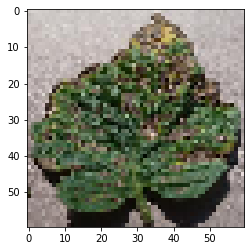

In [ ]:
from skimage import io
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

model = load_model('Lenet.h5')

disease_types = ['Tomato_mosaic_virus',
                 'Tomato_Late_blight',
                 'Tomato_Septoria_leaf_spot',
                 'Tomato_Bacterial_spot',
                 'Tomato_Spider_mites',
                 'Tomato_Yellow_Leaf_Curl_Virus',
                 'Tomato_Leaf_Mold',
                 'Tomato_Target_Spot',
                 'Tomato_healthy',
                 'Tomato_Early_blight']

show_img=image.load_img('/content/Total/Tomato_Late_blight/Tomato_Late_blight (1004).JPG', grayscale=False, target_size=(60, 60))
img = image.load_img('/content/Total/Tomato_Late_blight/Tomato_Late_blight (1004).JPG', target_size=(60, 60))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)

a=classes[0]
ind=np.argmax(a)
print(ind)
print('Prediction:',disease_types[ind])

plt.imshow(show_img)
plt.show()

# Plotting the Model

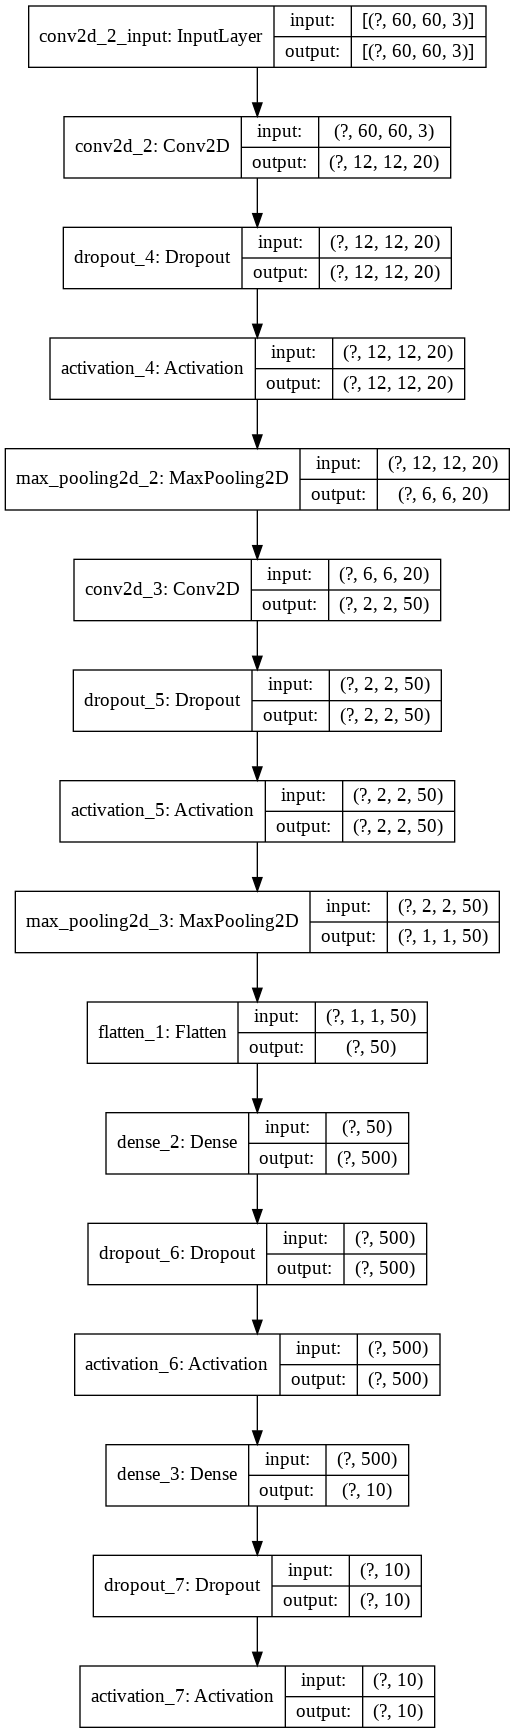

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model1.png', show_shapes=True, rankdir='TB', expand_nested=True)

# Evaluation Metrics

Text(0.5, 144.41374999999996, 'Predicted')

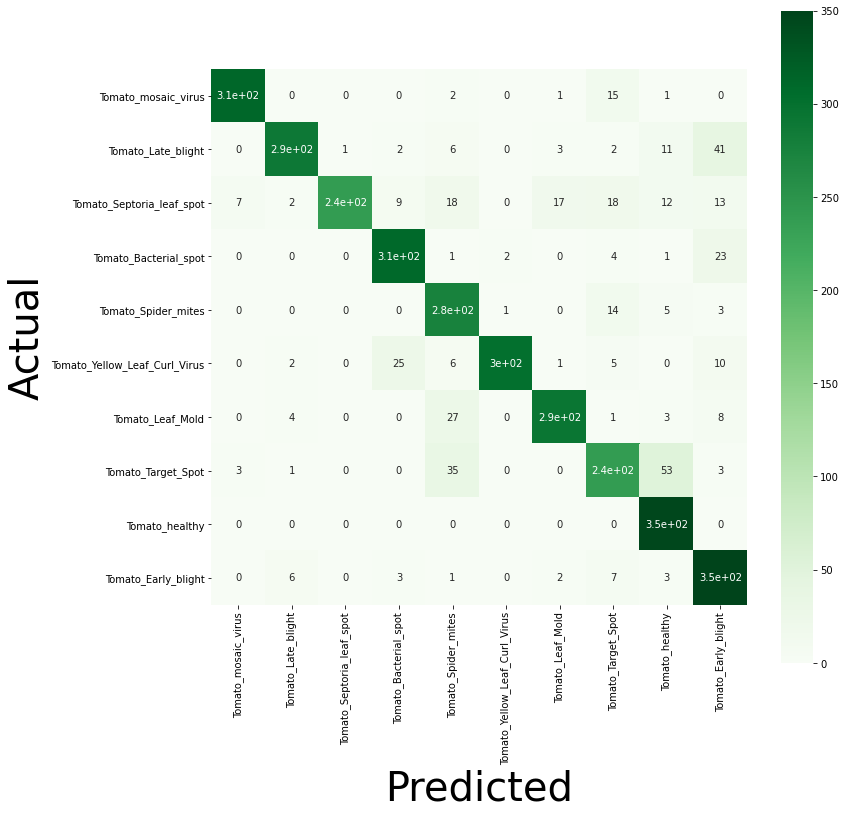

In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import accuracy_score 
import sklearn.metrics as metrics

print ("Accuracy : ", metrics.accuracy_score(Y_true, Y_pred)*100)

Accuracy :  86.94117647058823


In [ ]:
# Precision
from sklearn.metrics import precision_score

precision_score(Y_true, Y_pred, average=None)

array([0.96904025, 0.95065789, 0.99583333, 0.88825215, 0.74193548,
       0.99013158, 0.92429022, 0.78289474, 0.79587156, 0.77605322])

In [ ]:
# Recall

from sklearn.metrics import recall_score
recall_score(Y_true, Y_pred, average=None)

array([0.94277108, 0.81408451, 0.71343284, 0.90909091, 0.92307692,
       0.86      , 0.87202381, 0.71471471, 1.        , 0.94086022])

In [ ]:
# F1_score
from sklearn.metrics import f1_score

f1_score(Y_true, Y_pred, average=None)

array([0.95572519, 0.87708649, 0.83130435, 0.89855072, 0.82265276,
       0.9204893 , 0.89739663, 0.74725275, 0.88633461, 0.85054678])

In [ ]:
from sklearn.metrics import r2_score

r2_score(Y_true, Y_pred)

0.6833286077585997

In [ ]:
#MAE L1 loss function - Should be close to 0

from sklearn.metrics import mean_absolute_error  
mean_absolute_error(Y_true, Y_pred)

0.5032352941176471

In [ ]:
#MAE L2 loss function - Should be close to 0

from sklearn.metrics import mean_squared_error  
mean_squared_error(Y_true, Y_pred)

2.6738235294117647

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       332
           1       0.95      0.81      0.88       355
           2       1.00      0.71      0.83       335
           3       0.89      0.91      0.90       341
           4       0.74      0.92      0.82       299
           5       0.99      0.86      0.92       350
           6       0.92      0.87      0.90       336
           7       0.78      0.71      0.75       333
           8       0.80      1.00      0.89       347
           9       0.78      0.94      0.85       372

    accuracy                           0.87      3400
   macro avg       0.88      0.87      0.87      3400
weighted avg       0.88      0.87      0.87      3400



# Complete!